In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn as sk
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report

In [14]:
fg_df = pd.read_csv(r"C:\Users\trush\OneDrive\Documents\WFU Grad School Info\BAN 6025 Machine Learning\Data\FG.csv")
fg_df.head()

,Yards,Success,Week
0,30,1,1
1,41,1,1
2,50,1,1
3,22,1,1
4,33,1,1


Data Preparation

In [15]:
#Make the class variable categorical
fg_df['Success'] = fg_df['Success'].astype('category')

#Look at the response counts
success_counts = fg_df['Success'].value_counts()
print(success_counts)

Success
1    756
0    192
Name: count, dtype: int64


Fit the Logistic Regression Model

In [16]:
#X dataframe + intercept constant
X = fg_df.drop(columns=['Success'])
X = sm.add_constant(X)

#Y dataframe = class variable
y = fg_df['Success']

#Fitting the Model
lr = sm.Logit(y, X).fit()

#Print the summary
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.426615
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Success   No. Observations:                  948
Model:                          Logit   Df Residuals:                      945
Method:                           MLE   Df Model:                            2
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:                  0.1534
Time:                        14:50:52   Log-Likelihood:                -404.43
converged:                       True   LL-Null:                       -477.69
Covariance Type:            nonrobust   LLR p-value:                 1.528e-32
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2997      0.511     12.327      0.000       5.298       7.301
Yards         -0.1127      0.

Add the predicted probabilities and their success predictions to the dataset

In [17]:
#Predicted Values
probability = lr.predict(X)

#Threshold of 0.5 greater than means success
psuccess = (probability > 0.5).astype(int)

#Add these columns to the dataset
fg_df['Probability Predicted'] = probability
fg_df['Probability of Success'] = psuccess

fg_df

,Yards,Success,Week,Probability Predicted,Probability of Success
0,30,1,1,0.946099,1
1,41,1,1,0.835498,1
2,50,1,1,0.648051,1
3,22,1,1,0.977403,1
4,33,1,1,0.926012,1
...,...,...,...,...,...
943,42,1,17,0.662271,1
944,46,1,17,0.555394,1
945,47,1,17,0.527411,1
946,52,0,17,0.388428,0


Confusion Matrix

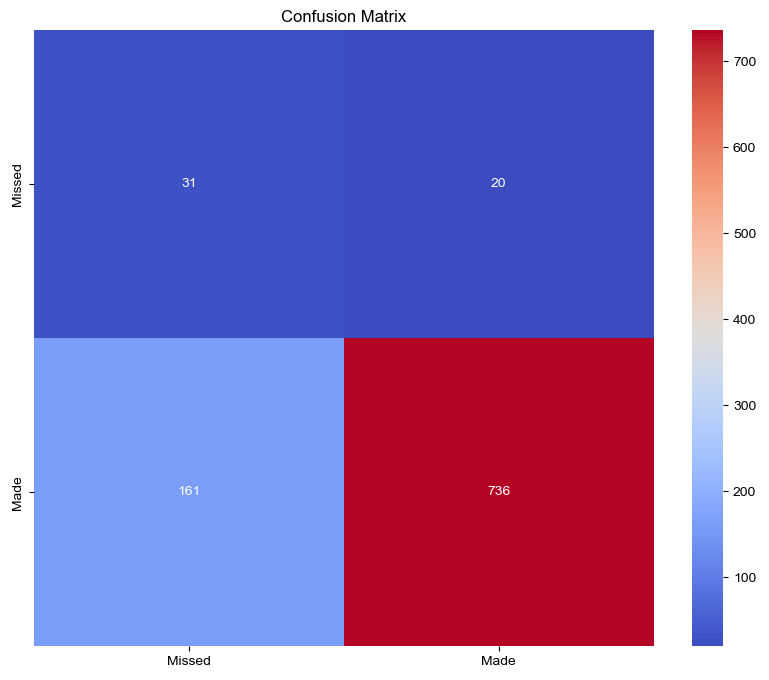

In [18]:
confusion_matrix = confusion_matrix(psuccess, y)

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix, annot=True, cmap='coolwarm', xticklabels=['Missed', 'Made'],
            yticklabels=['Missed', 'Made'], fmt='g')
sns.set_style('ticks', {'axes.formatter.useoffset': False})
plt.title('Confusion Matrix')
plt.show()

Classification Report

In [19]:
print(classification_report(psuccess, y))

              precision    recall  f1-score   support

           0       0.16      0.61      0.26        51
           1       0.97      0.82      0.89       897

    accuracy                           0.81       948
   macro avg       0.57      0.71      0.57       948
weighted avg       0.93      0.81      0.86       948

